In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_s_area(img_path, res_l):
    src = cv2.imread(img_path)
    rc = (975, 909, 2555, 999)
    src = src[rc[1]:rc[1]+rc[3], rc[0]:rc[0]+rc[2]]
    dst = src
    src_hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

    # dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))
    dst1 = cv2.inRange(src_hsv, (16, 13, 0), (80, 250, 255))
    dst2 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, None)
    res_l.append(sum(sum(dst2)))

def get_a_area(img_path, res_l):
    src = cv2.imread(img_path)
    rc = (621, 221, 2988, 2624)
    src = src[rc[1]:rc[1]+rc[3], rc[0]:rc[0]+rc[2]]
    dst = src
    src_hsv = cv2.cvtColor(dst, cv2.COLOR_BGR2HSV)

    # dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))
    dst1 = cv2.inRange(src_hsv, (16, 13, 0), (80, 250, 255))
    dst2 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, None)
    res_l.append(sum(sum(dst2)))

f1_l = "./Open"
f2_l = [f"/t{i}" for i in ["01", "02", "03", "04", "05", "06", "07", "08", "09"] + [i for i in range(10, 31)]]
f3_l = [f"/{i}.jpg" for i in range(1,6)]

pf_l = [f1_l+i for i in f2_l]
f_l_1 = [i+f3_l[0] for i in pf_l]
f_l_2 = [i+f3_l[1] for i in pf_l]
f_l_3 = [i+f3_l[2] for i in pf_l]
f_l_4 = [i+f3_l[3] for i in pf_l]
f_l_5 = [i+f3_l[4] for i in pf_l]

dic = dict()

res_l_1 = []
for i in f_l_1:
    get_s_area(i, res_l_1)
dic["1"] = res_l_1

res_l_2 = []
for i in f_l_2:
    get_s_area(i, res_l_2)
dic["2"] = res_l_2

res_l_3 = []
for i in f_l_3:
    get_s_area(i, res_l_3)
dic["3"] = res_l_3

res_l_4 = []
for i in f_l_4:
    get_s_area(i, res_l_4)
dic["4"] = res_l_4

res_l_5 = []
for i in f_l_5:
    get_a_area(i, res_l_5)
dic["5"] = res_l_5

# res_count = pd.read_excel("./Open/Kong_Open_True.xlsx", skiprows=1)
f = open("count.txt", 'r')
line = f.readline()
count = line.split()
f.close()
dic["count"] = count
# # print([res_l_1[0], res_l_2[0], res_l_3[0], res_l_4[0], res_l_5[0], res_count[0]])
# data = pd.DataFrame.from_dict(dic)
# data["final"] = (data["1"] + data["2"] + data["3"] + data["4"])/4*0.6 + data["5"]*0.4
dic["final"] = dic["2"]

[44, 60, 49, 129, 39, 22, 513, 196, 263, 170, 98, 379, 1600, 2, 31, 5, 1190, 151, 108, 122, 75, 84, 10, 24, 1375, 7, 1032, 1429, 1323, 691]


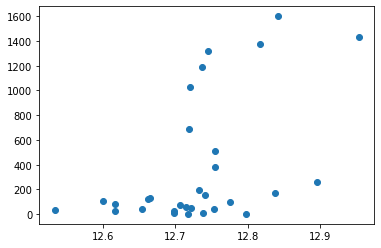

In [28]:
x = dic["final"]
y = [int(i) for i in dic["count"]]
y.sort
print(y)
plt.plot(np.log(x),y,'o')

In [29]:
linear_model=np.polyfit(np.log(x),y,3)
print(linear_model, type(linear_model))
linear_model_fn=np.poly1d(linear_model)

y_new = linear_model_fn(x)

res = [100*abs(y_new[i]-y[i])/y[i]**2 for i in range(len(x))]
print(sum(res))

[-1.29856132e+04  5.01315181e+05 -6.44717450e+06  2.76217439e+07] <class 'numpy.ndarray'>
1.630021557228492e+22


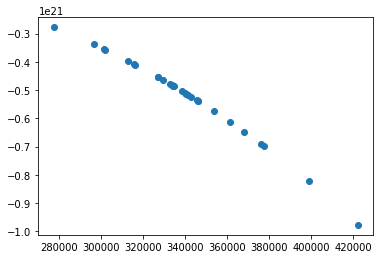

In [30]:
plt.plot(x,y_new,'o')